In [9]:
data_set = pd.read_csv('titanic_train.csv')

In [5]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#We are creating a heatmap to see where we missed the data
#using seaborn
data_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

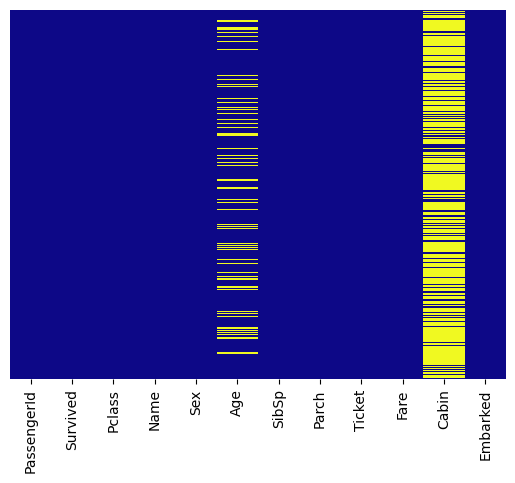

In [16]:
#create a heatmap visualization to identify missing (null) values in a dataset using the Seaborn library. 
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='plasma')

<Axes: xlabel='Survived', ylabel='count'>

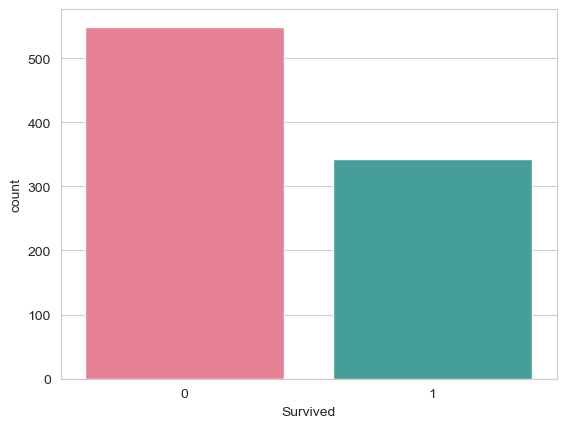

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data_set,palette='husl')

<Axes: xlabel='Survived', ylabel='count'>

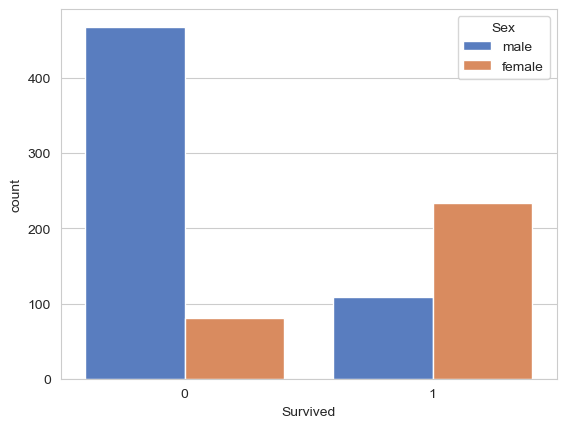

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data_set,palette='muted')

<Axes: xlabel='Survived', ylabel='count'>

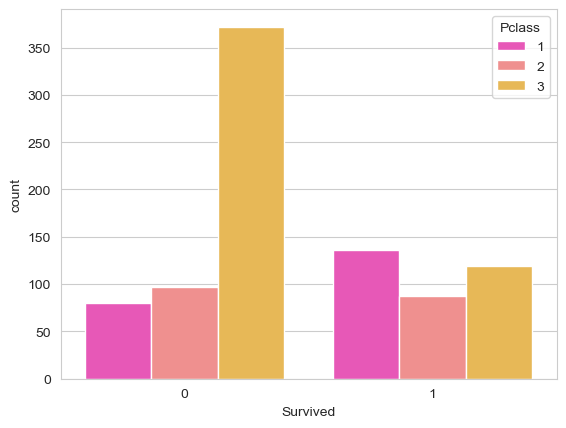

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data_set,palette='spring')

C:\Users\anupu\AppData\Local\Temp\ipykernel_16036\244090753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['Age'].dropna(), kde=False, color='blue', bins=40)


<Axes: xlabel='Age'>

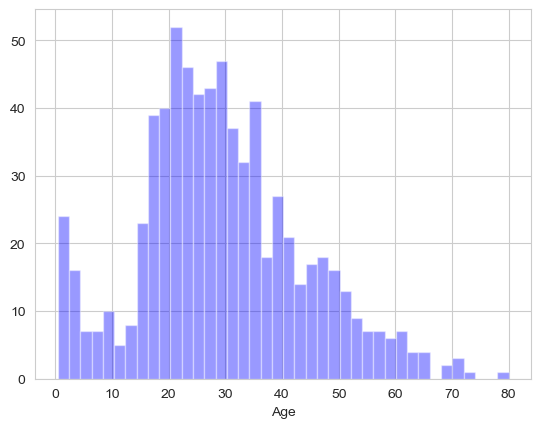

In [32]:
sns.distplot(data_set['Age'].dropna(), kde=False, color='blue', bins=40)


<Axes: >

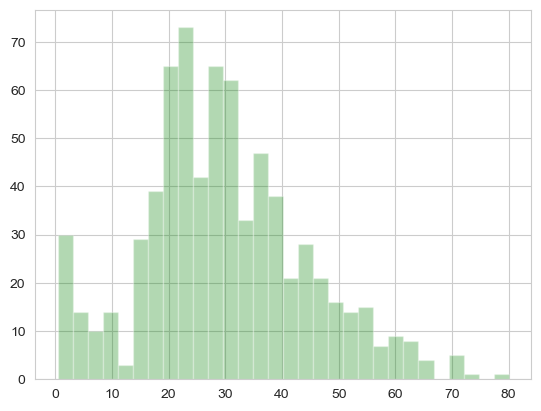

In [34]:
data_set['Age'].hist(bins=30,color='green',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

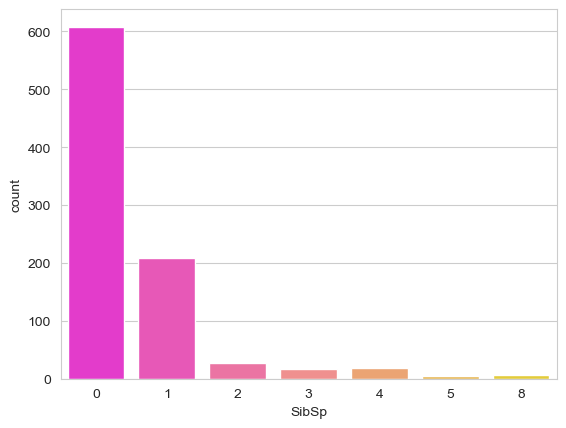

In [36]:
sns.countplot(x='SibSp',data=data_set,palette='spring')

<Axes: >

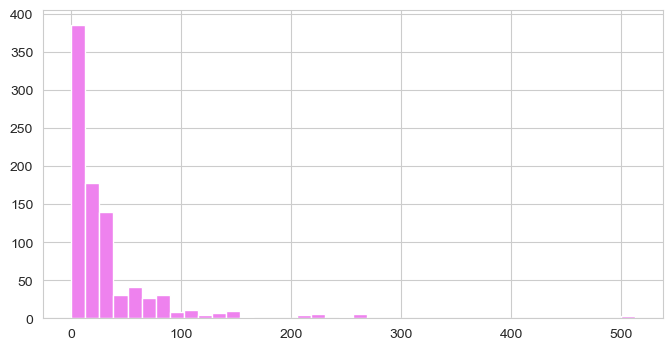

In [38]:
data_set['Fare'].hist(color='violet',bins=40,figsize=(8,4))

In [43]:
data_set['Fare'].iplot(kind='hist',bins=20,color='lightgreen')

In [40]:
import cufflinks as cf
cf.go_offline()

<Axes: xlabel='Pclass', ylabel='Age'>

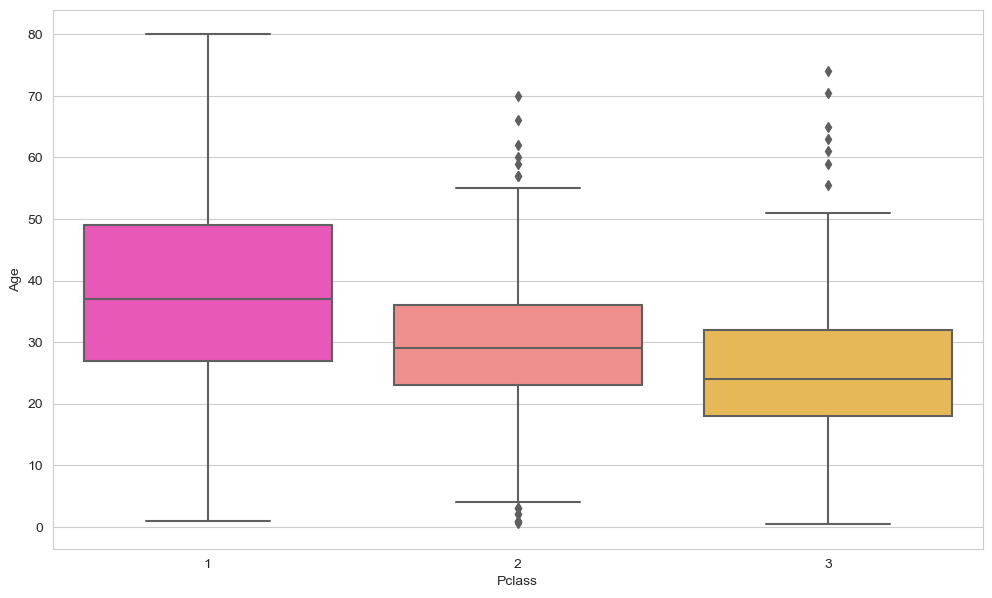

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data_set,palette='spring')

In [47]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [49]:
data_set['Age'] = data_set[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

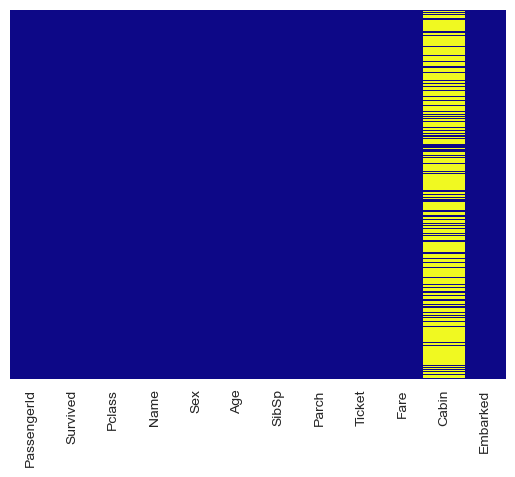

In [52]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [54]:
data_set.drop('Cabin',axis=1,inplace=True)

In [56]:
data_set.dropna(inplace=True)

In [57]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [58]:
pd.get_dummies(data_set['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
sex_data = pd.get_dummies(data_set['Sex'],drop_first=True)
embark_data = pd.get_dummies(data_set['Embarked'],drop_first=True)

In [60]:
data_set.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [61]:
data_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [62]:
data_set = pd.concat([data_set,sex_data,embark_data],axis=1)

In [63]:
data_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
data_set.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [65]:
data_set['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X__train_data, X_test_data, y_train_data, y_test_data = train_test_split(data_set.drop('Survived',axis=1),data_set['Survived'], train_size=0.30, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X__train_data,y_train_data)

C:\Users\anupu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [72]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [74]:
predictions = logmodel.predict(X_test_data)


In [76]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test_data,predictions)

In [77]:
accuracy

array([[337,  47],
       [ 80, 159]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_data,predictions)
accuracy

0.7961476725521669

In [80]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [82]:
#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test_data,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       384
           1       0.77      0.67      0.71       239

    accuracy                           0.80       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.79      0.80      0.79       623

